In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-classification/fruit_classification_dataset.csv


**Table of Contents:**-
1. Data Lodaing
2. Data Cleaning and Preprocessing
3. Predictive Modeling
4. Summary and Future Work

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#use the agg backend for matplotlib and set inline plotting
plt.switch_backend('Agg')
%matplotlib inline
print('Imports and settings completed')

Imports and settings completed


In [3]:
#Data Loading
#Load the dataset with appropriate encoding and delimiter

df = pd.read_csv('/kaggle/input/fruit-classification/fruit_classification_dataset.csv', encoding='Windows-1252',delimiter=',')
print("Dataset loaded successfully with shape:",df.shape)

Dataset loaded successfully with shape: (10000, 7)


In [4]:
# Data Cleaning and Preprocessing

#Standardize column names for easier manipulation.
#We strip spaces, lower the text, and replace or remove special characters.

df.columns = [col.strip().lower().replace(' ', '_').replace('(cm)', 'cm').replace('(g)' , 'g') for col in df.columns]

#The avg_price column originally includes a currency symbol; for convenience we rename it to simply 'avg_price'.

rename_dict={}
for col in df.columns:
    if 'avg_price' in col:
        rename_dict[col] = 'avg_price'

df.rename(columns = rename_dict, inplace=True)

#Optionally, inspect the cleaned column names
print("Columns after renaming:", df.columns.tolist())

Columns after renaming: ['size_cm', 'shape', 'weight_g', 'avg_price', 'color', 'taste', 'fruit_name']


In [5]:
#Exploratory Data Analysis
#Identiy numeric and categorial columns

numeric_cols = ['size_cm', 'weight_g', 'avg_price']
categorical_cols = [col for col in df.columns if col not in numeric_cols]

print("Numeric columns:", numeric_cols)
print("Categorical columns", categorical_cols)

Numeric columns: ['size_cm', 'weight_g', 'avg_price']
Categorical columns ['shape', 'color', 'taste', 'fruit_name']


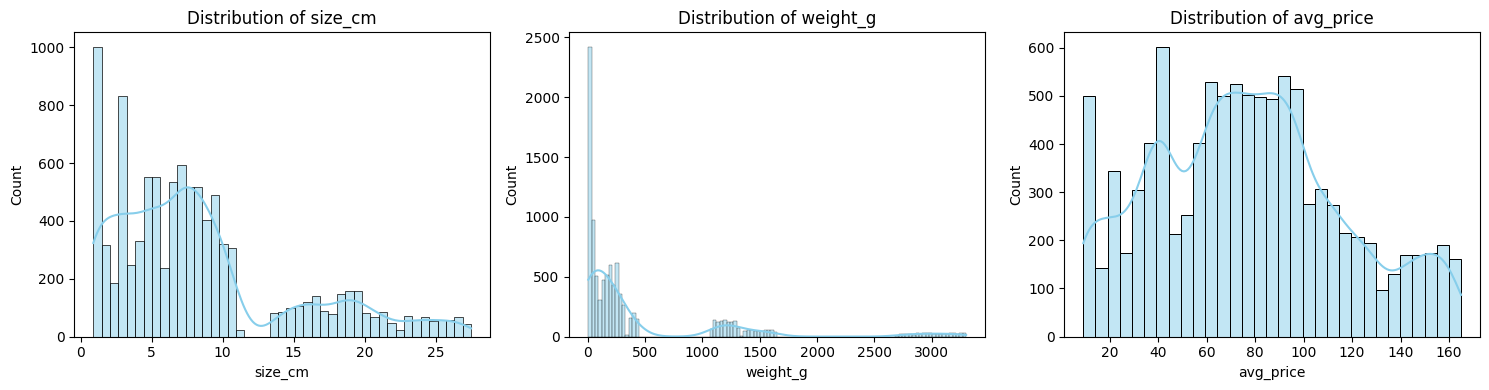

In [6]:
#Histograms for numeric features
plt.figure(figsize=(15,4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

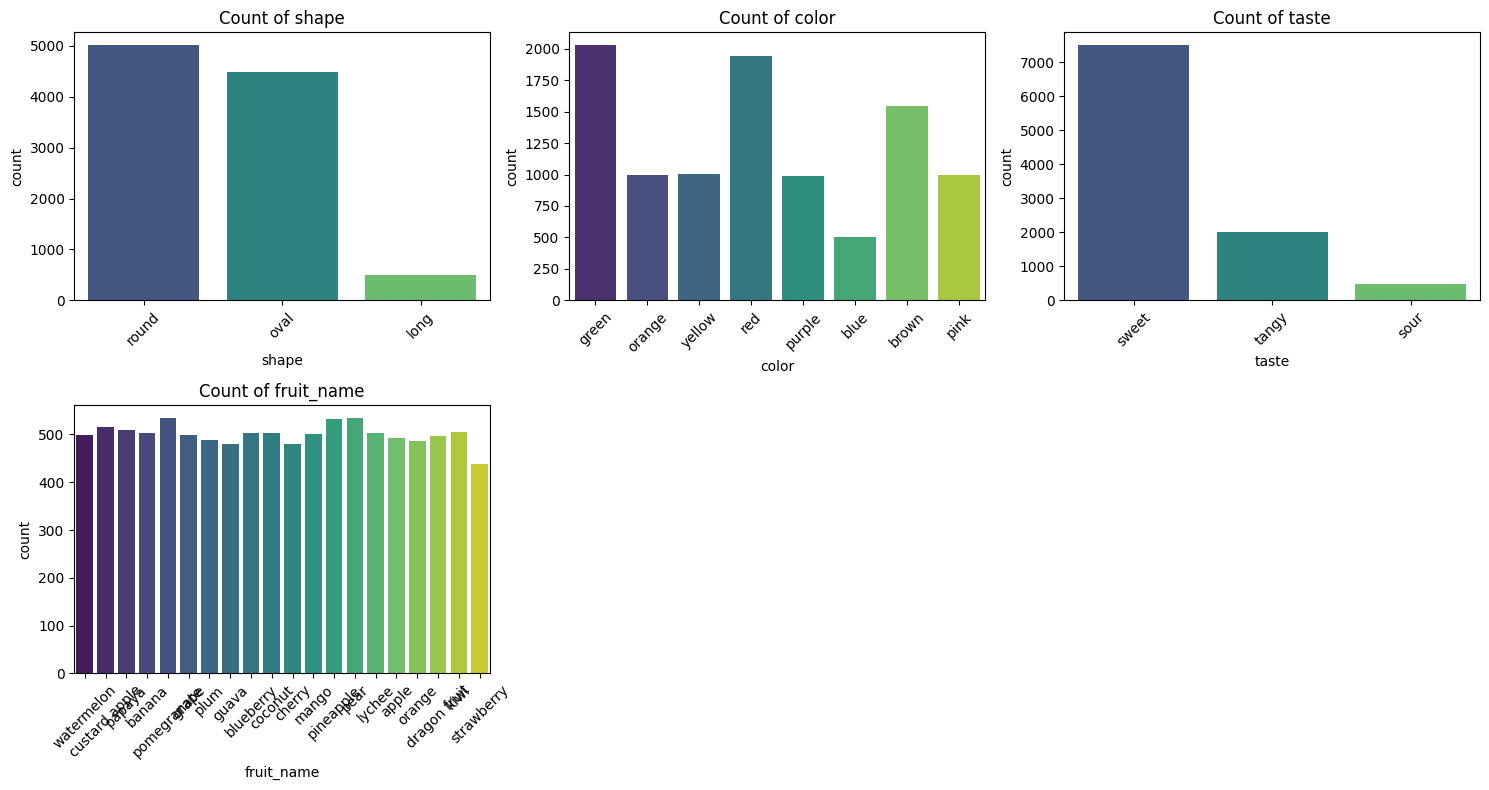

In [7]:
#Count plots for categorical features
plt.figure(figsize=(15,8))
for i, col in enumerate(categorical_cols):
    plt.subplot(2 ,3 , i+1)
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

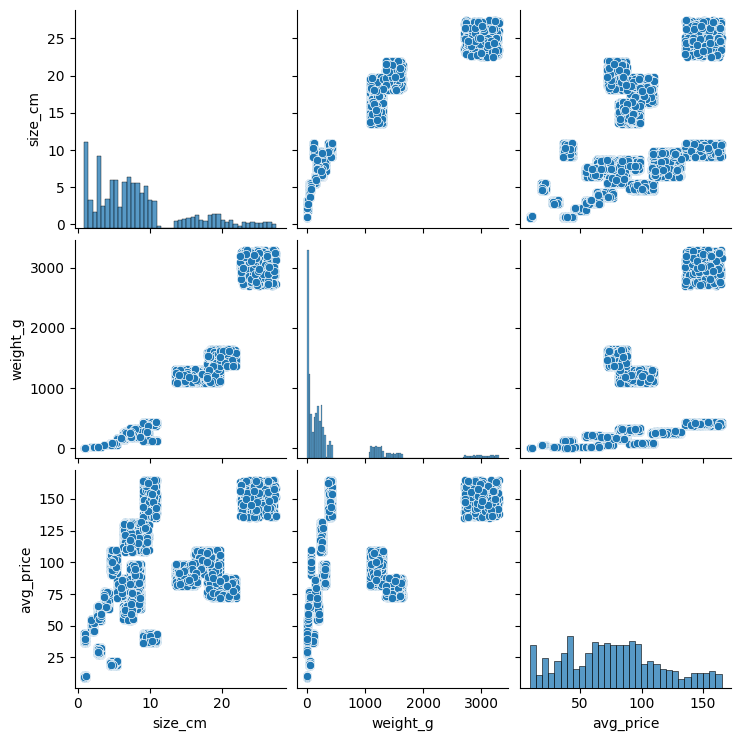

In [8]:
# pair plot for numeric feature
if len(numeric_cols) >= 2:
    sns.pairplot(df[numeric_cols])
    plt.show()

Prediction Accuracy: 1.0


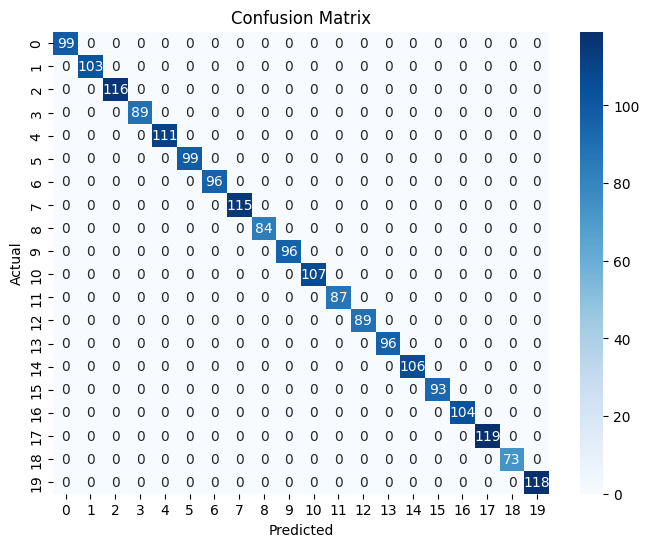

In [9]:
#Predictive Modeling

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#Our goal is to predict the 'fruit_name' given the other features

target = 'fruit_name'
if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found. Check the column names: {df.columns.tolist()}")

#Prepare features and target
X = df.drop(columns=[target])
y = df[target]

#Use one-hot encoding for categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size= 0.2, random_state=42)

#Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Calculate and print prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Prediction Accuracy:", accuracy)

#Plot confusion matix to evaluate model performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot= True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Summary**

in this notebook , we loaded and cleanded a fruit classification dataset,
perform exploratory data analysis using a variety of visualization techniques, and build a predictive  model using a RandomForestClassifier to classify fruits based on thier featues. This approch allowed us to understand both the distribution of numeric featres and the counts of categorical variables, while also providing a baseline classifier performance. 

Future work colud involve hyperparameter tuning, exploring addditional modeling techniques such as gradient boosting, incorporating cross-validation for more robust estimates, and further feature engineering. There are also opportunities to investigate coreelations in greater depth and to consider temporal or seasonal effects if a date dimension is added in future datasedts